# Author: Minhaj Uddin Meraj
# TASK 1: Prediction using Supervised ML
Predict the percentage of an student based on the no. of study hours

# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Importing all libraries/packages required in this notebook

In [1]:
import pandas as pd #to work with dataset files
import numpy as np  #to perfrom mathematical operations
import matplotlib.pyplot as plt  #for graphical representations
%matplotlib inline
from sklearn.model_selection import train_test_split #for split the data into train and test data

# Creating DataFrame From Given Dataset

In [2]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
#s_data.to_csv("Dataset.csv")

Data imported successfully


In [3]:
df = pd.read_csv("Dataset.csv",index_col=0)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 600.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

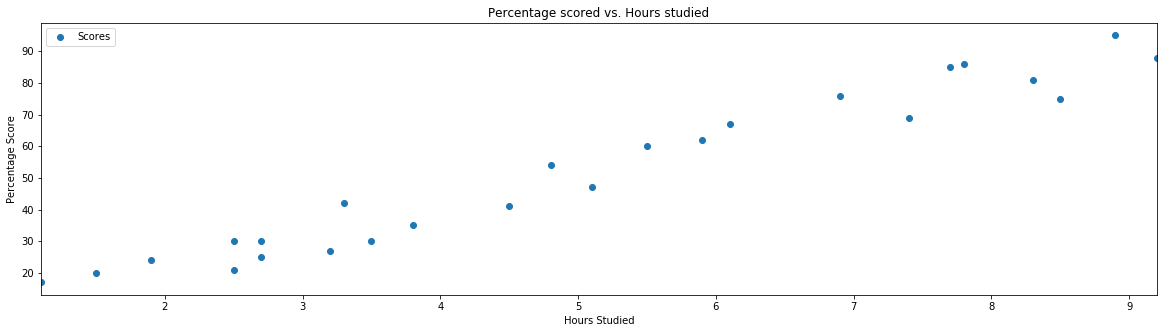

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o',figsize = (20,5))  
plt.title('Percentage scored vs. Hours studied')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = df.iloc[:,:-1].values # independent variable (Hours)
y = df.iloc[:, -1].values # dependent variable (Scores)

In [9]:
np.shape(X) # 25 samples

(25, 1)

In [10]:
np.shape(y) # Label for each sample

(25,)

The next step is to split this data into training and test sets (Ratio - 70:30) by usingScikit-Learn's built-in train_test_split() method 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training the Algorithm¶
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [12]:
from sklearn.linear_model import LinearRegression 

In [13]:
lm = LinearRegression() # creating Linear Regression Object

In [14]:
lm.fit(X_train,y_train) # use .fit in order to train or fit my model on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print("Intercept : {}".format(lm.intercept_))
print("Coefficient : {}".format(lm.coef_))

Intercept : 2.370815382341881
Coefficient : [9.78856669]


# Linear Regression Line
The estimated regression line has the equation 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥

The attributes of model are .intercept, which represents the coefficient, 𝑏₀ and .coef, which represents 𝑏₁

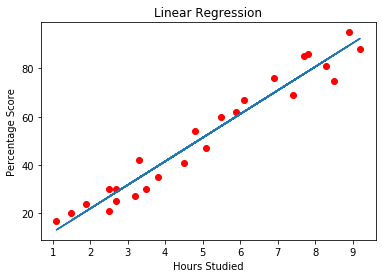

In [16]:
#Plotting the regression line
Reg_Line = lm.coef_ * X + lm.intercept_

plt.title('Linear Regression')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 

# Plotting for test data
plt.scatter(X,y,c='r')
plt.plot(X,Reg_Line)
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
#Testing data - In Hours
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [18]:
# Predicting the scores
predictions = lm.predict(X_test) 

In [19]:
predictions

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [20]:
# Comparing Actual vs Predicted
df_ = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df_ 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [21]:
print("Test Score: {}".format(lm.score(X_test,y_test)))
print("Training Score: {}".format(lm.score(X_train,y_train)))

Test Score: 0.9568211104435257
Training Score: 0.9484997422695115


# Testing with own data

In [22]:
given_hours = 9.25
predict = lm.predict([[given_hours]])
print("No of Hours = {}".format(given_hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


# Evaluation Of The Model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, predictions)) 

Mean Absolute Error: 4.419727808027652


# RESULT : For 9.25 hours of study percentage expected is 93 % approx.